## **TUGAS PEMROGRAMAN 3 - K-Nearest Neighbor**
### **Rekomendasi Mobil**

Oleh Kelompok 1 IF-43-09:
1. Kurniadi Ahmad Wijaya - 1301194024
2. Naufal Haritsah Luthfi -	1301194073 
3. Hanvito Michael Lee - 1301190090

### **Import Library**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('https://github.com/ShinyQ/Tugas-Pengantar-AI-3_KNN/blob/main/mobil.xls?raw=true')
df.head()

,Nama Mobil,Ukuran,Kenyamanan,Irit,Kecepatan,Harga (Ratus Juta)
0,Toyota Agya,4,4,9,6,1.00
1,Daihatsu Alya,4,3,9,6,1.10
2,Toyota Avanza,6,5,6,6,2.00
3,Daihatsu Xenia,6,4,6,6,1.75
4,Xpander,7,7,6,7,2.25


### **Exploratory Data Analysis**

In [ ]:
df.describe(include='all')

,Nama Mobil,Ukuran,Kenyamanan,Irit,Kecepatan,Harga (Ratus Juta)
count,17,17.000000,17.000000,17.000000,17.000000,17.000000
unique,17,NaN,NaN,NaN,NaN,NaN
top,Toyota Hiace,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.529412,6.352941,6.941176,6.823529,3.247059
std,NaN,2.034627,2.234423,1.784327,1.131111,2.406597
min,NaN,3.000000,3.000000,4.000000,5.000000,0.800000
25%,NaN,5.000000,4.000000,6.000000,6.000000,1.750000
50%,NaN,7.000000,7.000000,7.000000,7.000000,2.300000
75%,NaN,8.000000,8.000000,9.000000,8.000000,5.000000


##### **Distribusi Data Harga**

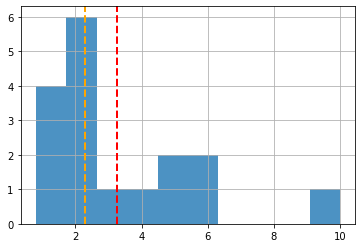

In [ ]:
df['Harga (Ratus Juta)'].hist(alpha=0.8)
plt.axvline(df['Harga (Ratus Juta)'].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df['Harga (Ratus Juta)'].median(), color='orange', linestyle='dashed', linewidth=2, label='Median')

### **Data Preprocessing**

##### **Memeriksa Data Yang Hilang**

In [ ]:
df.isna().sum()

Nama Mobil            0
Ukuran                0
Kenyamanan            0
Irit                  0
Kecepatan             0
Harga (Ratus Juta)    0
dtype: int64

##### **Rename Dan Drop Kolom Yang Tidak Dibutuhkan**

In [ ]:
data = df.rename({'Harga (Ratus Juta)': 'Harga'}, axis=1)
data = data.drop('Nama Mobil', axis=1)
data.head()

,Ukuran,Kenyamanan,Irit,Kecepatan,Harga
0,4,4,9,6,1.00
1,4,3,9,6,1.10
2,6,5,6,6,2.00
3,6,4,6,6,1.75
4,7,7,6,7,2.25


### **Modelling**

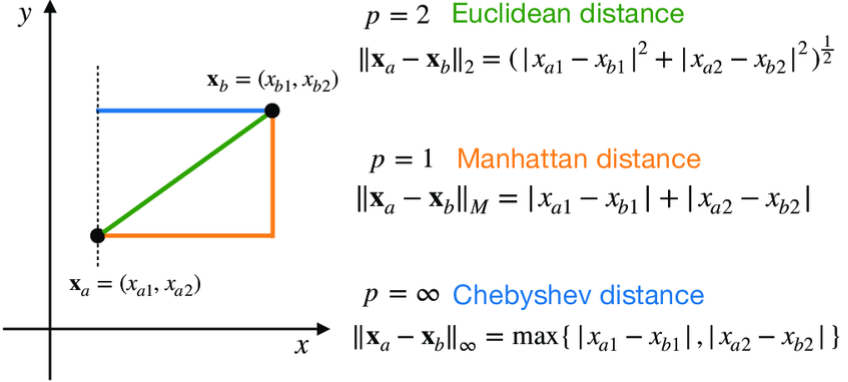

In [ ]:
def euclidean_distance(x, y):
    dist = 0
    for i in range(len(y)):
        dist += (x[i] - y[i])**2

    return dist ** (1/2)

def manhattan_distance(x, y):
    dist = 0
    for i in range(len(x)):
        dist += abs(x[i] - y[i])

    return dist
 
def minkowski_distance(x, y, p=2):
    dist = 0
    for i in range(len(x)):
        dist += abs(x[i] - y[i]) ** p

    return dist ** (1/p)

def supremum_distance(x, y):
    dist = []
    for i in range(len(x)):
        dist.append(abs(x[i] - y[i]))

    return max(dist)

In [ ]:
def get_distance(x, y):
    euclidean, manhattan, minkowski, supremum = [], [], [], []

    for i in range(len(x)):
        minkowski.append([minkowski_distance(x.iloc[i].tolist(), y), df['Nama Mobil'][i]])
        manhattan.append([manhattan_distance(x.iloc[i].tolist(), y), df['Nama Mobil'][i]])
        euclidean.append([euclidean_distance(x.iloc[i].tolist(), y), df['Nama Mobil'][i]])
        supremum.append([supremum_distance(x.iloc[i].tolist(), y), df['Nama Mobil'][i]])

    return euclidean, manhattan, minkowski, supremum

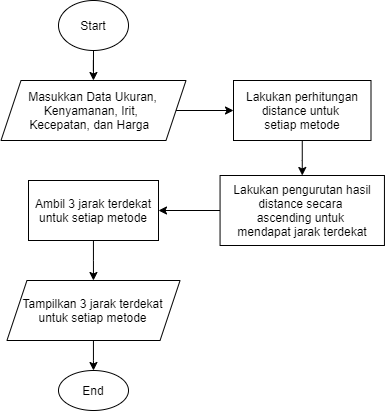

In [ ]:
def knn(x, y, k=3):
    euclidean, manhattan, minkowski, supremum = get_distance(x, y)

    euclidean = sorted(euclidean)[:k]
    manhattan = sorted(manhattan)[:k]
    minkowski = sorted(minkowski)[:k]
    supremum = sorted(supremum)[:k]

    distances = [['Euclidean', euclidean[:k]], 
                  ['Manhattan', manhattan[:k]], 
                  ['Minkowski', minkowski[:k]], 
                  ['Supremum', supremum[:k]]]
                
    return distances

### **Input Feature Variable**

In [ ]:
ukuran = int(input("Masukkan Ukuran: "))
kenyamanan = int(input("Masukkan Kenyamanan: "))
irit = int(input("Masukkan Irit: "))
kecepatan = float(input("Masukkan Kecepatan: "))
harga = float(input("Masukkan Harga: "))

Masukkan Ukuran: 1
Masukkan Kenyamanan: 2
Masukkan Irit: 3
Masukkan Kecepatan: 4
Masukkan Harga: 5


### **Hasil Rekomendasi**

In [ ]:
input = [ukuran, kenyamanan, irit, kecepatan, harga] 
distances = knn(data, input)

for method in distances:
      print("\n--------------------------------------------------")
      print(f'Metode: {method[0]}')
      print("--------------------------------------------------")
      
      car = []

      for i, distance in enumerate(method[1]):
          print(f'{i+1}. {distance[1]}, Distance: {round(distance[0], 2)}')
          car.append(distance[1])
      
      car = pd.DataFrame(car)
      car.to_excel(f'{method[0]}.xls', index=False, header=False)  


--------------------------------------------------
Metode: Euclidean
--------------------------------------------------
1. Daihatsu Xenia, Distance: 7.25
2. Toyota Avanza, Distance: 7.48
3. Daihatsu Alya, Distance: 8.08

--------------------------------------------------
Metode: Manhattan
--------------------------------------------------
1. Daihatsu Xenia, Distance: 15.25
2. Karimun, Distance: 15.8
3. Daihatsu Alya, Distance: 15.9

--------------------------------------------------
Metode: Minkowski
--------------------------------------------------
1. Daihatsu Xenia, Distance: 7.25
2. Toyota Avanza, Distance: 7.48
3. Daihatsu Alya, Distance: 8.08

--------------------------------------------------
Metode: Supremum
--------------------------------------------------
1. Daihatsu Xenia, Distance: 5.0
2. Toyota Avanza, Distance: 5.0
3. Daihatsu Alya, Distance: 6.0
